In [37]:
# library imports

import tensorflow as tf
import tensorflow.keras.layers as kl
import matplotlib.pyplot as plt
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image


In [22]:
# MNIST dataset download and normalization

dataset_mnist=tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test)=dataset_mnist.load_data()
x_train,x_test=x_train/255,x_test/255

In [23]:
# train and test data sets shapes

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [32]:
# FNN model implementation

inputs=kl.Input(shape=(28,28))
input_layer=kl.Flatten()(inputs)
hidden_layer=kl.Dense(256,activation=tf.nn.relu)(input_layer)
output_layer=kl.Dense(10,activation=tf.nn.softmax)(hidden_layer)

In [ ]:
# training the model

model=tf.keras.models.Model(inputs,output_layer)
model.summary()
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
results=model.fit(x_train,y_train,epochs=10,validation_split=0.2)
# plot_model(model, to_file='model.png')
# Image(retina=True, filename='model.png')

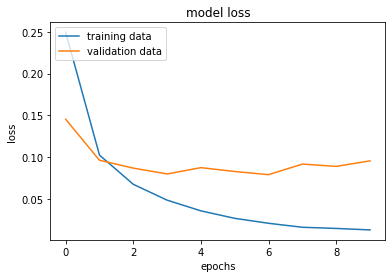

In [34]:
# plots for training and validation loss

plt.plot(results.history['loss'], label='training data')
plt.plot(results.history['val_loss'], label='validation data')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc="upper left")
plt.show()

In [35]:
# test loss and accuracy

test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("test_loss:{0} test_accuracy:{1}".format(test_loss,test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9775
test_loss:0.09076552838087082 test_accuracy:0.9775000214576721
